In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Placing the data into a dataframe
features = pd.DataFrame(boston.data,columns = boston.feature_names)


In [5]:
target = pd.DataFrame(boston.target,columns =['target'])
#Contacting the features and target into a single data frame
df = pd.concat([features,target], axis=1)

In [6]:
print(max(target['target']),min(target['target']))

50.0 5.0


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
corr = df.corr('pearson')
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
df['target'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: target, Length: 229, dtype: int64

In [10]:
z = np.abs(stats.zscore(df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]


In [11]:
#Z score greater in the range -3 and 3 indicates an unsual amount of distance from the center, meaning an outlier.
# For example the the output array basically means z[25][2] has an outlier where 25 is the row and 2 is the column.
#Note that we have quite a few outliers in the 2nd feature.
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [12]:
#Checking for outliers using interquartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
target       7.975000
dtype: float64


In [13]:
#True indicates outliers, returns boolean
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX  ...    TAX  PTRATIO      B  LSTAT  target
0    False  False  False  False  False  ...  False    False  False  False   False
1    False  False  False  False  False  ...  False    False  False  False   False
2    False  False  False  False  False  ...  False    False  False  False   False
3    False  False  False  False  False  ...  False    False  False  False   False
4    False  False  False  False  False  ...  False    False  False  False   False
..     ...    ...    ...    ...    ...  ...    ...      ...    ...    ...     ...
501  False  False  False  False  False  ...  False    False  False  False   False
502  False  False  False  False  False  ...  False    False  False  False   False
503  False  False  False  False  False  ...  False    False  False  False   False
504  False  False  False  False  False  ...  False    False  False  False   False
505  False  False  False  False  False  ...  False    False  False  False   False

[506 rows x 14 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Data Cleaning

In [14]:
#Removed the outliers using the zscore
df_1 = df[(z < 3).all(axis=1)]

In [15]:
#Similary, removing outliers found from the IQR
df_2 = df_1[~((df_1 < (Q1 - 1.5 * IQR)) | (df_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_2.shape

(268, 14)

In [16]:
df_2.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

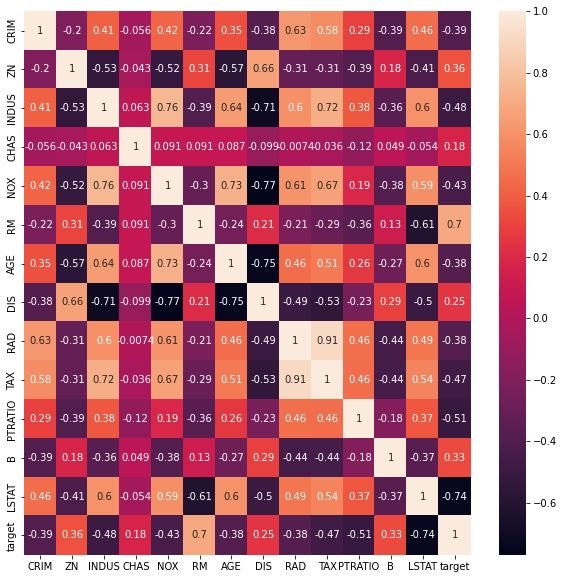

In [17]:
#We can also visualize it in the form of a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [18]:
#Absolute values of correaltions
corrs = [abs(corr[attr]['target']) for attr in list(features)]

#making a list of pairs (corr,features)
l1 = list(zip(corrs,list(features)))

In [19]:
# Zip takes multiple lists and turns them into a tuple of rows
l1

[(0.38830460858681154, 'CRIM'),
 (0.3604453424505433, 'ZN'),
 (0.48372516002837274, 'INDUS'),
 (0.17526017719029868, 'CHAS'),
 (0.42732077237328203, 'NOX'),
 (0.6953599470715401, 'RM'),
 (0.3769545650045961, 'AGE'),
 (0.249928734085904, 'DIS'),
 (0.38162623063977735, 'RAD'),
 (0.4685359335677667, 'TAX'),
 (0.5077866855375623, 'PTRATIO'),
 (0.3334608196570662, 'B'),
 (0.7376627261740145, 'LSTAT')]

In [20]:
#Sorting the list of pairs in descending order, using correlation as keys
l1.sort(key=lambda x:x[0], reverse = True)
l1

[(0.7376627261740145, 'LSTAT'),
 (0.6953599470715401, 'RM'),
 (0.5077866855375623, 'PTRATIO'),
 (0.48372516002837274, 'INDUS'),
 (0.4685359335677667, 'TAX'),
 (0.42732077237328203, 'NOX'),
 (0.38830460858681154, 'CRIM'),
 (0.38162623063977735, 'RAD'),
 (0.3769545650045961, 'AGE'),
 (0.3604453424505433, 'ZN'),
 (0.3334608196570662, 'B'),
 (0.249928734085904, 'DIS'),
 (0.17526017719029868, 'CHAS')]

In [21]:
#Unzipping the lists, zip(*l) converts a list [[1,2,3][4,5,6][7,8,9]] to [[1,4,7][2,5,8][3,6,9]]
corrs,labels = list(zip(*l1))

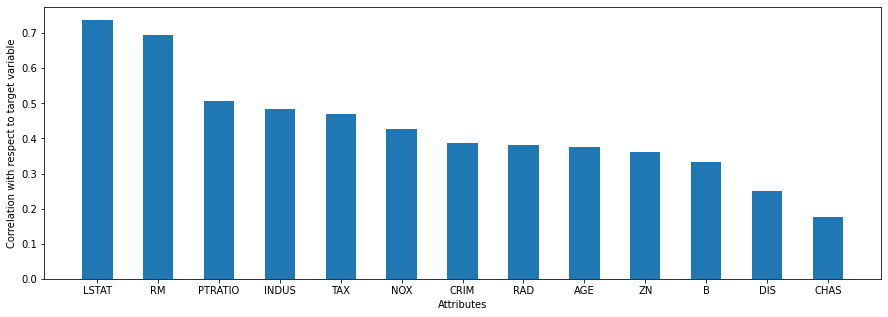

In [22]:
#Plotting correlation with respect to target for each of the attributes
index = np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with respect to target variable')
plt.xticks(index,labels)
plt.show()

# Hypothesis testing

In [23]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest,pval = stests.ztest(df['LSTAT'],x2=None)
print(float(pval))
if pval<0.05:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

0.0
We reject the null hypothesis


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
ztest,pval1 = stests.ztest(df['LSTAT'],x2 = df['target'],value = 0,alternative = 'two-sided')
print(float(pval1))
if pval1<0.05:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

3.2849233242736906e-81
We reject the null hypothesis


# Linear regression

In [25]:
# The correlation for LSTAT seems to be the highest
# So lets use LSTAT only to check to train and models and check the metrics
X = df_2['LSTAT'].values.reshape(-1,1)
y = df_2['target'].values.reshape(-1,1)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 7 )

In [27]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(187, 1) (81, 1) (187, 1) (81, 1)


In [28]:
regr = LinearRegression()

In [29]:
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

2.622599141585197

Text(0, 0.5, 'Target')

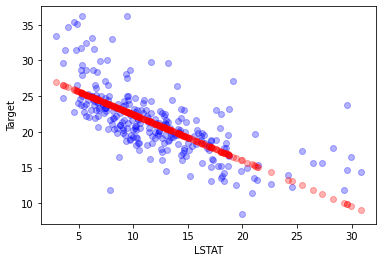

In [31]:
#Comparing values to the real one
y_pred = regr.predict(X) 
# Ploting real data y (blue)
plt.scatter(X[:,0], y, alpha=0.3, c="blue")
# versus predicted y_pred (red)
plt.scatter(X, y_pred, alpha=0.3, c="red")


plt.xlabel("LSTAT")
plt.ylabel("Target")

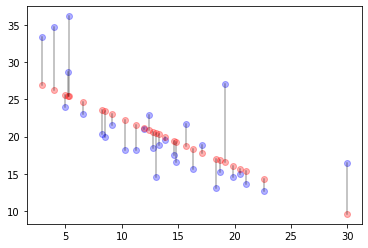

In [32]:
#Mean squared error and R2 Score

samples = 30
plt.scatter(X[:samples,0], y[:samples], alpha=0.3, c="blue")
plt.scatter(X[:samples,0], y_pred[:samples], alpha=0.3, c="red")
for i in range(samples):
    plt.plot([X[i, 0], X[i, 0]], [y[i], y_pred[i]], alpha=0.3, c="black")

In [33]:
#predicting and calculating the metrics
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regr.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

(3.7334895076528896, 0.252370938428471)

In [34]:
#calculating Training data RMSE and r2 for comparision
y_train_ = regr.predict(x_train)
print("On train: RMSE={}, R2={}".format(
    np.sqrt(mean_squared_error(y_train, y_train_)), 
    r2_score(y_train, y_train_)))

On train: RMSE=3.3402159761025594, R2=0.5234914041607863


In [35]:
#The model seems to be quite close to the actual train data.
# MAE,MSE,RSME and R2 score seems to be low indicating that it is a decent model.
#Now that we have implemented linear regression using just one independent variable with the higest corr
#Lets compare the metrics to a model built using all the features.

In [36]:
# Using all of the features to train and test

In [37]:
x1 = df_2.iloc[:,:-1].values
y1 = df_2['target']


In [38]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state = 7)

In [39]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(187, 13) (81, 13) (187,) (81,)


In [40]:
regr = LinearRegression()

In [41]:
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

2.088951224210212

In [43]:
#predicting and calculating the metrics
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regr.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

(2.7490046196593716, 0.5946714045268816)

In [44]:
#calculating Training data RMSE and r2 for comparision
y_train_ = regr.predict(x_train)
print("On train: RMSE={}, R2={}".format(
    np.sqrt(mean_squared_error(y_train, y_train_)), 
    r2_score(y_train, y_train_)))

On train: RMSE=2.4384246324263747, R2=0.7460546205534506


In [45]:
print('slope', regr.coef_)
print('Interscept',regr.coef_)

slope [-1.07039779e+00 -1.60900997e-02 -7.91994138e-03  2.72004641e-15
 -1.94563036e+00  4.03687973e+00 -3.57192493e-02 -7.17646840e-01
  4.76003750e-01 -1.53088638e-02 -6.57106410e-01  1.04583862e-02
 -2.47750747e-01]
Interscept [-1.07039779e+00 -1.60900997e-02 -7.91994138e-03  2.72004641e-15
 -1.94563036e+00  4.03687973e+00 -3.57192493e-02 -7.17646840e-01
  4.76003750e-01 -1.53088638e-02 -6.57106410e-01  1.04583862e-02
 -2.47750747e-01]


# Ridge

In [46]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

In [47]:
X = df_2.iloc[:,:-1]
y = df_2.iloc[:,-1]

In [48]:
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model

In [49]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 1.942 (0.376)


In [50]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred_train_rr= rr.predict(x_train)
print('MAE Mean on train data:',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('r2 Score on train data:',r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(x_test)
print('Mean MAE on test data:',np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('r2 Score on test data: ',r2_score(y_test, pred_test_rr))

MAE Mean on train data: 2.438425493513755
r2 Score on train data: 0.7460544412006036
Mean MAE on test data: 2.749138619371583
r2 Score on test data:  0.5946318882317712
